In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Final_Train1.csv")

In [3]:
df_test=pd.read_csv("Final_Test1.csv")

In [4]:
df_main=df.append(df_test)

In [5]:
#both the trining and testing data are added so all the transformation will be applicable for both and later on the training and testing data can be seprated

In [6]:
df_main.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


In [7]:
df_main.shape

(7948, 7)

In [8]:
#There are 7948 rows and 7 columns

In [9]:
df_main.dtypes

Qualification          object
Experience             object
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
dtype: object

In [10]:
#each and every column is object type except the output column

In [11]:
df_main.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [12]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
dtypes: float64(1), object(6)
memory usage: 496.8+ KB


In [13]:
#There are null values in the dataset

In [14]:
df_main["Qualification"].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Medicine, Post Graduate Diploma in Diabetology (PGDD), MBBS, FRCP - Internal Medicine',
       'MBBS, MS - General Surgery, FAIS, FIAGES',
       'MBBS, MD / MS - Obstetrics & Gynaecology'], dtype=object)

In [15]:
df_main["Qualification"].value_counts()

BDS                                                                                                 632
BHMS                                                                                                627
BAMS                                                                                                624
MBBS                                                                                                441
MBBS, MS - ENT                                                                                      280
                                                                                                   ... 
BHMS, MD - Homeopathy, PGNAHI                                                                         1
MRCS (UK), MBBS                                                                                       1
MD - Anaesthesiology, Diploma in Anesthesiology, MBBS                                                 1
MBBS, MD - General Medicine, Post Graduate Diploma in Diabetolog

In [16]:
df_main['Qualification1'] = df_main['Qualification'].str.split(',').str[0]
df_main['Qualification2'] = df_main['Qualification'].str.split(',').str[1]
df_main['Qualification3'] = df_main['Qualification'].str.split(',').str[2]

In [17]:
df_main.head(5)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,BHMS,MD - Homeopathy,NaN
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,BAMS,MD - Ayurveda Medicine,NaN
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,MBBS,MS - Otorhinolaryngology,NaN
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0,BSc - Zoology,BAMS,NaN
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,BAMS,NaN,NaN


In [18]:
df_main["Qualification1"].unique()

array(['BHMS', 'BAMS', 'MBBS', 'BSc - Zoology', 'BDS', 'BSc', 'MDS',
       'Diploma in Dermatology', 'DM - Neurology', 'MD - Homeopathy',
       'MDS - Prosthodontist And Crown Bridge',
       'MDS - Oral & Maxillofacial Surgery',
       'MDS - Periodontology and Oral Implantology', 'MD - Dermatology',
       'MDS-Oral Pathology and Oral Microbiology', 'MD - Dermatology ',
       'Get inspired by remarkable stories of people like you',
       'PhD - Orthodontics & Dentofacial Orthopaedics', 'MRCPS',
       'MDS - Conservative Dentistry & Endodontics',
       'MD - Ayurveda Medicine', 'MS - General Surgery', 'DDVL',
       'MD - General Medicine',
       'DHMS (Diploma in Homeopathic Medicine and Surgery)', 'MS - ENT',
       'MD - Internal Medicine', 'GCEH', 'MS - Otorhinolaryngology',
       'Post Graduate Diploma in Healthcare Management(PGDHM)',
       'DNB - Paediatrics', 'Certification in Aesthetic Dentistry',
       'Fellowship In Laryngology Bronchoesophagology', 'FAGE',
      

In [19]:
df_main["Qualification1"].value_counts()

MBBS                                                     3313
BDS                                                      1579
BAMS                                                      939
BHMS                                                      938
MD - Dermatology                                          102
                                                         ... 
Post Graduate Diploma in Healthcare Management(PGDHM)       1
Ayurvedic panchkarma                                        1
Fellowship in Diabetology                                   1
M.Sc - Biochemistry                                         1
MS - Orthopaedics                                           1
Name: Qualification1, Length: 181, dtype: int64

In [20]:
df_main["Qualification2"].unique()

array([' MD - Homeopathy', ' MD - Ayurveda Medicine',
       ' MS - Otorhinolaryngology', ' BAMS', nan,
       ' MD - General Medicine', ' BDS', ' MS', ' MDS',
       ' MDS - Oral & Maxillofacial Surgery',
       ' Diploma in Otorhinolaryngology (DLO)', ' MF- Homeopathy',
       ' MS - ENT', ' DNB', ' DNB - ENT',
       ' Fellowship of College of General Practice (FCGP)', ' DDVL',
       ' IBCLC (USA)', ' MBBS', ' MD - Pediatrics',
       ' Diploma in Cosmetology', ' AFIH',
       ' MDS - Prosthodontist And Crown Bridge',
       ' M. D. Hom. (Practice of Medicine)',
       ' Diploma in Emergency Medicine',
       ' DHMS (Diploma in Homeopathic Medicine and Surgery)',
       ' MD - Dermatology ', ' MDS - Oral and Maxillofacial Pathology',
       ' Member of the Royal College of Physicians', ' MS - Psychology',
       ' Diploma In Skin Aesthetics',
       ' Certificate in Cosmetic Dentistry', ' MD - Dermatology',
       ' MD - Rheumatology',
       ' MDS - Paedodontics And Preventive Den

In [21]:
df_main["Qualification2"].value_counts()

 MS - ENT                                      392
 MD - Dermatology                              338
 MD - General Medicine                         327
 MBBS                                          289
 Diploma in Otorhinolaryngology (DLO)          256
                                              ... 
 Advance Diploma in Nutrition and Dietetics      1
 Post Graduate Diploma in Health                 1
 Fundamental in Oral Implantology                1
 Robert Turner Diabetes Research Training        1
 Post Graduate in Homeopathy(london)             1
Name: Qualification2, Length: 495, dtype: int64

In [22]:
df_main["Qualification3"].unique()

array([nan, ' DNB - ENT', ' BDS',
       ' Post Graduate Diploma in Diabetology (PGDD)',
       ' Fellowship in Aesthetic Medicine', ' MBBS',
       ' Fellowship in Cleft Lip and Craniofacial Surgery',
       ' Diploma in Counselling Skills', ' Venereology & Leprosy',
       ' MFDS RCS', ' MRCS (UK)', ' UK (MRCP UK)', ' MD - Dermatology ',
       ' Post Graduate Certificate in Endodontics (PGCE)', ' FRCP',
       ' FICD', ' Master of Hospital Administration',
       ' Fellow of Academy of General Education (FAGE)',
       ' MD - Dermatology', ' FAMS - Fellowship of the Academy Medicine',
       ' DNB - Internal Medicine', ' PhD - Homoeopathy',
       ' MDS - Orthodontics and Dentofacial Orthopaedics',
       ' Diploma in Otorhinolaryngology (DLO)', ' MS - Psychology',
       ' Member of the Royal Society for the Promotion of Health (UK) (MRSH)',
       ' MSc - Psychotherapy And Counselling', ' MSc - Yoga', ' DLO',
       ' Post Graduate Diploma in Counselling & Psychotherapy',
       '

In [23]:
df_main["Qualification3"].value_counts()

 Venereology & Leprosy                                     252
 MBBS                                                      146
 DNB - ENT                                                  89
 MS - ENT                                                   50
 Diploma in Otorhinolaryngology (DLO)                       48
                                                          ... 
 MCh - Cardio Thoracic Surgery                               1
 Member Of The National Academy Of Medical Sciences          1
 Fellowship in Paediatric gastroenterology & Hepatology      1
 PhD - Psychology                                            1
 D.Y.A                                                       1
Name: Qualification3, Length: 481, dtype: int64

In [24]:
#quaification column is been seprated in 3 columns(Qualification1,Qualification2,Qualification3) so that the label enoding can be done 

In [25]:
df_main["Experience"]

0       24 years experience
1       12 years experience
2        9 years experience
3       12 years experience
4       20 years experience
               ...         
1982    10 years experience
1983     4 years experience
1984     9 years experience
1985    12 years experience
1986     8 years experience
Name: Experience, Length: 7948, dtype: object

In [26]:
df_main["Experience"].value_counts()

9 years experience     419
10 years experience    404
8 years experience     380
11 years experience    374
12 years experience    358
                      ... 
66 years experience      1
58 years experience      1
64 years experience      1
61 years experience      1
60 years experience      1
Name: Experience, Length: 64, dtype: int64

In [27]:
#the column is in object data type to make it numerical extracting the years which are in numerical

In [28]:
df_main['yearsinexp'] = df_main['Experience'].str.slice(stop=2).astype(int)

In [29]:
df_main.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,yearsinexp
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,BHMS,MD - Homeopathy,NaN,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,BAMS,MD - Ayurveda Medicine,NaN,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,MBBS,MS - Otorhinolaryngology,NaN,9
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0,BSc - Zoology,BAMS,NaN,12
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,BAMS,NaN,NaN,20


In [30]:
#we can drop the qualification and experience column from the dataset

In [31]:
df_main = df_main.drop(df_main[['Experience','Qualification']], axis=1)

In [32]:
df_main.head(5)

,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,yearsinexp
0,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,BHMS,MD - Homeopathy,NaN,24
1,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,BAMS,MD - Ayurveda Medicine,NaN,12
2,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,MBBS,MS - Otorhinolaryngology,NaN,9
3,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0,BSc - Zoology,BAMS,NaN,12
4,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,BAMS,NaN,NaN,20


In [33]:
df_main['City'] = df_main['Place'].str.split(',').str[1]

In [34]:
df_main.head(5)

,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,yearsinexp,City
0,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,BHMS,MD - Homeopathy,NaN,24,Ernakulam
1,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,BAMS,MD - Ayurveda Medicine,NaN,12,Bangalore
2,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,MBBS,MS - Otorhinolaryngology,NaN,9,Bangalore
3,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0,BSc - Zoology,BAMS,NaN,12,Bangalore
4,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,BAMS,NaN,NaN,20,Chennai


In [35]:
df_main["City"].value_counts()

 Bangalore             1678
 Mumbai                1608
 Delhi                 1601
 Hyderabad             1284
 Chennai               1142
 Coimbatore             298
 Ernakulam              201
 Thiruvananthapuram     103
 Sector 5                 1
Name: City, dtype: int64

In [36]:
df_main["City"].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', nan, ' Sector 5'],
      dtype=object)

In [37]:
df_main['Address'] = df_main['Place'].str.split(',').str[0]

In [38]:
df_main.head(5)

,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,yearsinexp,City,Address
0,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,BHMS,MD - Homeopathy,NaN,24,Ernakulam,Kakkanad
1,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,BAMS,MD - Ayurveda Medicine,NaN,12,Bangalore,Whitefield
2,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,MBBS,MS - Otorhinolaryngology,NaN,9,Bangalore,Mathikere - BEL
3,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0,BSc - Zoology,BAMS,NaN,12,Bangalore,Bannerghatta Road
4,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,BAMS,NaN,NaN,20,Chennai,Keelkattalai


In [39]:
df_main["Address"].unique()

array(['Kakkanad', 'Whitefield', 'Mathikere - BEL', 'Bannerghatta Road',
       'Keelkattalai', 'Porur', 'Karol Bagh', 'Arekere', 'Old City',
       'Athani', 'Thousand Lights', 'Somajiguda', 'Coimbatore Racecourse',
       'Jubilee Hills', 'Kondli', 'Saroor Nagar', 'Tambaram West',
       'Purasawakkam', 'KPHB', 'HSR Layout', 'Pollachi',
       'Vasundhra Enclave', 'Chembur', 'Thammanam', 'Andheri', 'Pattom',
       'Kukatpally', 'Vadavalli', 'Defence Colony', 'Banjara Hills',
       'Sion West', 'CR Park', 'Mogappair East', 'IP Extension',
       'Safdarjung Enclave', 'New Friends Colony', 'Borivali West',
       'Saket', 'Malad', 'Hyder Nagar', 'Dahisar West', 'RT Nagar',
       'Powai', 'Basheerbagh', 'Musheerabad', 'AS Rao Nagar', 'Madhapur',
       'Gandhinagar', 'Chetpet', 'Vileparle East', 'Yelahanka New Town',
       'Kodambakkam', 'Malleswaram', 'Pallikaranai', 'Nallakunta',
       'Paschim Vihar', 'Meera Bagh', 'Chattarpur', 'Andheri West',
       'Himayat Nagar', 'Adambakka

In [40]:
df_main["Address"].value_counts()

HSR Layout         97
Andheri West       97
Dwarka             94
Banjara Hills      85
Mulund West        81
                   ..
Rohini Sector 6     1
Vigyan Vihar        1
Balaramapuram       1
Silampur            1
Eroor South         1
Name: Address, Length: 937, dtype: int64

In [41]:
#dropping the place column

In [42]:
df_main=df_main.drop(["Place"],axis=1)

In [43]:
df_main.head()

,Rating,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,yearsinexp,City,Address
0,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,BHMS,MD - Homeopathy,NaN,24,Ernakulam,Kakkanad
1,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,BAMS,MD - Ayurveda Medicine,NaN,12,Bangalore,Whitefield
2,NaN,ENT Specialist,NaN,300.0,MBBS,MS - Otorhinolaryngology,NaN,9,Bangalore,Mathikere - BEL
3,NaN,Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0,BSc - Zoology,BAMS,NaN,12,Bangalore,Bannerghatta Road
4,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,BAMS,NaN,NaN,20,Chennai,Keelkattalai


In [44]:
# we cannot convert float NaN to integer so replacing the nan values with 0%

In [45]:
df_main['Rating'].fillna('0%',inplace = True)

In [46]:
df_main["Rating"].unique()

array(['100%', '98%', '0%', '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%', '52%'],
      dtype=object)

In [47]:
df_main['Rating'] = df_main['Rating'].str.slice(stop=-1).astype(int)

In [48]:
df_main["Rating"].unique()

array([100,  98,   0,  99,  79,  95,  97,  94,  88,  90,  80,  93,  36,
        78,  87,  96,  82,  89,  74,  86,  92,  83,  76,  85,  56,  91,
        68,  60,  75,  69,  73,  67,  77,  33,  55,  71,  84,  45,  63,
        72,  81,  62,  57,   7,  48,  40,  70,  64,  65,  47,  58,  53,
        52])

In [49]:
#converted the % data to int

In [50]:
df_main.head(5)

,Rating,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,yearsinexp,City,Address
0,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,BHMS,MD - Homeopathy,NaN,24,Ernakulam,Kakkanad
1,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,BAMS,MD - Ayurveda Medicine,NaN,12,Bangalore,Whitefield
2,0,ENT Specialist,NaN,300.0,MBBS,MS - Otorhinolaryngology,NaN,9,Bangalore,Mathikere - BEL
3,0,Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0,BSc - Zoology,BAMS,NaN,12,Bangalore,Bannerghatta Road
4,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,BAMS,NaN,NaN,20,Chennai,Keelkattalai


In [51]:
df_main["Miscellaneous_Info"][0:20]

0                  100% 16 Feedback Kakkanad, Ernakulam
1                 98% 76 Feedback Whitefield, Bangalore
2                                                   NaN
3     Bannerghatta Road, Bangalore ?250 Available on...
4                 100% 4 Feedback Keelkattalai, Chennai
5                                                   NaN
6                                                   NaN
7     Dental Fillings Crowns and Bridges Fixing Impa...
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12    98% 14 Feedback Coimbatore Racecourse, Coimbatore
13        Dental Crowns Facet Dental Dental prophylaxis
14                                                  NaN
15                                                  NaN
16                                                  NaN
17                                              

In [52]:
df_main["Miscellaneous_Info"][3]

3    Bannerghatta Road, Bangalore ?250 Available on...
3                                                  NaN
Name: Miscellaneous_Info, dtype: object

In [53]:
df_main["Miscellaneous_Info"].unique()

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore', nan, ...,
       'General Dentistry Dental Fillings RCT - Single Sitting',
       '98% 240 Feedback Velachery, Chennai',
       'RCT - Root Canal Treatment Root Canal Treatment - Rotary Pyorrhoea Treatment'],
      dtype=object)

In [54]:
df_main["Miscellaneous_Info"].value_counts()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                 50
Skin Allergy Treatment Skin Allergies Dermabrasion                                 18
Tooth Extraction Dental Fillings Scaling / Polishing                               16
Dental Fillings Zirconia Crowns Dental Implant Fixing                              15
Dermabrasion Laser Resurfacing Acne / Pimples Treatment                            14
                                                                                   ..
94% 3 Feedback Nallakunta, Hyderabad                                                1
Hair Transplant Surgery Laser Hair Removal Dermabrasion                             1
92% 3 Feedback AS Rao Nagar, Hyderabad                                              1
94% 119 Feedback Punjagutta, Hyderabad                                              1
Artificial Teeth Impaction / Impacted Tooth Extraction Presurgical Orthodontics     1
Name: Miscellaneous_Info, Length: 3980, dtype: int64

In [55]:
#finding out what type of data is in miscellaneous column

In [56]:
df_main['Misc'] = df_main['Miscellaneous_Info'].str.split('%').str[0]

In [57]:
df_main["Misc"][0:20]

0                                                   100
1                                                    98
2                                                   NaN
3     Bannerghatta Road, Bangalore ?250 Available on...
4                                                   100
5                                                   NaN
6                                                   NaN
7     Dental Fillings Crowns and Bridges Fixing Impa...
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12                                                   98
13        Dental Crowns Facet Dental Dental prophylaxis
14                                                  NaN
15                                                  NaN
16                                                  NaN
17                                              

In [58]:
df_main['Misclen'] = df_main['Misc'].str.len()

In [59]:
df_main['Misclen'][0:5]

0     3.0
1     2.0
2     NaN
3    58.0
4     3.0
Name: Misclen, dtype: float64

In [60]:
#the string length less than 3 is the integer number can be extracted 

In [61]:
df_main.loc[df_main['Misclen']>3, 'Misc'] = 0

In [62]:
df_main['Misc'].fillna(0,inplace = True)

In [63]:
df_main['Misc'] = df_main['Misc'].astype(int)

In [64]:
df_main["Misc"][0:10]

0    100
1     98
2      0
3      0
4    100
5      0
6      0
7      0
8      0
9      0
Name: Misc, dtype: int32

In [65]:
#number got extracted

In [66]:
df_main['Misc1'] = df_main['Miscellaneous_Info'].str.split('% ').str[1]

In [67]:
df_main["Misc1"][0:10]

0      16 Feedback Kakkanad, Ernakulam
1    76 Feedback Whitefield, Bangalore
2                                  NaN
3                                  NaN
4     4 Feedback Keelkattalai, Chennai
5                                  NaN
6                                  NaN
7                                  NaN
8                                  NaN
9                                  NaN
Name: Misc1, dtype: object

In [68]:
#seprated the string with the % data

In [69]:
df_main['Misc2'] = df_main['Misc1'].str.split(' ').str[0]

In [70]:
df_main["Misc2"]

0        16
1        76
2       NaN
3       NaN
4         4
       ... 
1982    NaN
1983    NaN
1984    NaN
1985    NaN
1986    NaN
Name: Misc2, Length: 7948, dtype: object

In [71]:
df_main['Misc2'].fillna(0,inplace = True)

In [72]:
df_main["Misc2"][0:10]

0    16
1    76
2     0
3     0
4     4
5     0
6     0
7     0
8     0
9     0
Name: Misc2, dtype: object

In [73]:
#seprated the feedback value

In [74]:
df_main['Misc2len'] = df_main['Misc2'].str.len()

In [75]:
df_main['Misc2len'][0:10]

0    2.0
1    2.0
2    NaN
3    NaN
4    1.0
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Misc2len, dtype: float64

In [76]:
df_main.loc[df_main['Misc2len']>3, 'Misc2'] = 0

In [77]:
df_main.loc[df_main['Misc2']==',', 'Misc2'] = 0

In [78]:
df_main['Misc2'] = df_main['Misc2'].astype(int)

In [79]:
df_main['Misc2'][0:10]

0    16
1    76
2     0
3     0
4     4
5     0
6     0
7     0
8     0
9     0
Name: Misc2, dtype: int32

In [80]:
#seprated the feedback column also

In [81]:
df_main['Misc3'] = df_main['Misc']*np.log((1+df_main['Misc2']))

In [82]:
df_main['Misc3'][0:10]

0    283.321334
1    425.692931
2      0.000000
3      0.000000
4    160.943791
5      0.000000
6      0.000000
7      0.000000
8      0.000000
9      0.000000
Name: Misc3, dtype: float64

In [83]:
df_main.head(5)

,Rating,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,yearsinexp,City,Address,Misc,Misclen,Misc1,Misc2,Misc2len,Misc3
0,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,BHMS,MD - Homeopathy,NaN,24,Ernakulam,Kakkanad,100,3.0,"16 Feedback Kakkanad, Ernakulam",16,2.0,283.321334
1,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,BAMS,MD - Ayurveda Medicine,NaN,12,Bangalore,Whitefield,98,2.0,"76 Feedback Whitefield, Bangalore",76,2.0,425.692931
2,0,ENT Specialist,NaN,300.0,MBBS,MS - Otorhinolaryngology,NaN,9,Bangalore,Mathikere - BEL,0,NaN,NaN,0,NaN,0.000000
3,0,Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0,BSc - Zoology,BAMS,NaN,12,Bangalore,Bannerghatta Road,0,58.0,NaN,0,NaN,0.000000
4,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,BAMS,NaN,NaN,20,Chennai,Keelkattalai,100,3.0,"4 Feedback Keelkattalai, Chennai",4,1.0,160.943791


In [84]:
df_main = df_main.drop(df_main[['Miscellaneous_Info','Misclen',"Misc1","Misc2len","Misc3"]], axis=1)

In [85]:
df_main

,Rating,Profile,Fees,Qualification1,Qualification2,Qualification3,yearsinexp,City,Address,Misc,Misc2
0,100,Homeopath,100.0,BHMS,MD - Homeopathy,NaN,24,Ernakulam,Kakkanad,100,16
1,98,Ayurveda,350.0,BAMS,MD - Ayurveda Medicine,NaN,12,Bangalore,Whitefield,98,76
2,0,ENT Specialist,300.0,MBBS,MS - Otorhinolaryngology,NaN,9,Bangalore,Mathikere - BEL,0,0
3,0,Ayurveda,250.0,BSc - Zoology,BAMS,NaN,12,Bangalore,Bannerghatta Road,0,0
4,100,Ayurveda,250.0,BAMS,NaN,NaN,20,Chennai,Keelkattalai,100,4
...,...,...,...,...,...,...,...,...,...,...,...
1982,0,Ayurveda,NaN,BAMS,Doctor of Medicine,NaN,10,Bangalore,Basavanagudi,0,0
1983,0,Dermatologists,NaN,MD - Dermatology,Venereology & Leprosy,MBBS,4,Chennai,Choolai,0,0
1984,0,General Medicine,NaN,MBBS,MD / MS - Obstetrics & Gynaecology,NaN,9,Chennai,Porur,0,0
1985,98,Dentist,NaN,BDS,NaN,NaN,12,Bangalore,Arekere,0,0


In [86]:
#dropped all the useless data

In [87]:
#df_train = df_main[0:5961]

In [88]:
df_main.describe()

,Rating,Fees,yearsinexp,Misc,Misc2
count,7948.000000,5961.000000,7948.000000,7948.000000,7948.000000
mean,42.321465,307.944640,17.446653,24.144439,10.135128
std,47.324081,190.920373,11.201217,41.139370,39.901270
min,0.000000,5.000000,0.000000,0.000000,0.000000
25%,0.000000,150.000000,9.000000,0.000000,0.000000
50%,0.000000,300.000000,15.000000,0.000000,0.000000
75%,96.000000,500.000000,23.000000,70.000000,1.000000
max,100.000000,950.000000,66.000000,100.000000,854.000000


In [89]:
#TREATING THE NULL VALUES

In [90]:
df_main.isnull().sum()

Rating               0
Profile              0
Fees              1987
Qualification1       0
Qualification2    2571
Qualification3    6088
yearsinexp           0
City                32
Address             31
Misc                 0
Misc2                0
dtype: int64

<AxesSubplot:>

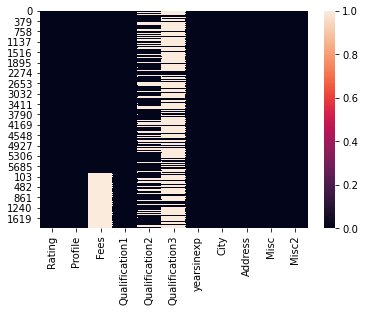

In [91]:
sns.heatmap(df_main.isnull())

<AxesSubplot:xlabel='Fees', ylabel='Density'>

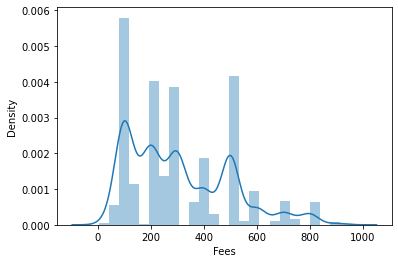

In [92]:
sns.distplot(df_main["Fees"])

In [93]:
#df_main["Fees"]=df_main["Fees"].fillna(df_main["Fees"].median())

<AxesSubplot:>

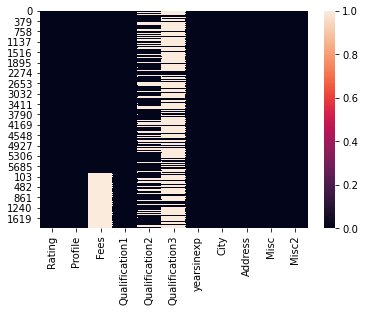

In [94]:
sns.heatmap(df_main.isnull())

In [95]:
df_main["Qualification2"].value_counts()

 MS - ENT                                      392
 MD - Dermatology                              338
 MD - General Medicine                         327
 MBBS                                          289
 Diploma in Otorhinolaryngology (DLO)          256
                                              ... 
 Advance Diploma in Nutrition and Dietetics      1
 Post Graduate Diploma in Health                 1
 Fundamental in Oral Implantology                1
 Robert Turner Diabetes Research Training        1
 Post Graduate in Homeopathy(london)             1
Name: Qualification2, Length: 495, dtype: int64

In [96]:
#df_main["Qualification2"]=df_main["Qualification2"].fillna(df_main["Qualification2"].mode())

In [97]:
df_main["Qualification2"]=df_main["Qualification2"].fillna("MS - ENT")

<AxesSubplot:>

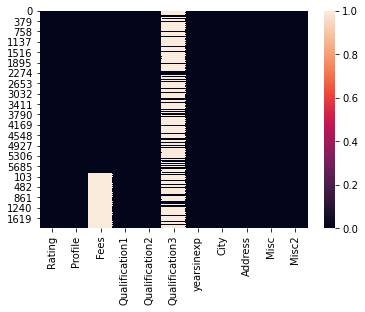

In [98]:
sns.heatmap(df_main.isnull())

In [99]:
#qualification2 column values has been removed

In [100]:
df_main.drop("Qualification3",axis=1,inplace=True)

In [101]:
df_main.head(5)

,Rating,Profile,Fees,Qualification1,Qualification2,yearsinexp,City,Address,Misc,Misc2
0,100,Homeopath,100.0,BHMS,MD - Homeopathy,24,Ernakulam,Kakkanad,100,16
1,98,Ayurveda,350.0,BAMS,MD - Ayurveda Medicine,12,Bangalore,Whitefield,98,76
2,0,ENT Specialist,300.0,MBBS,MS - Otorhinolaryngology,9,Bangalore,Mathikere - BEL,0,0
3,0,Ayurveda,250.0,BSc - Zoology,BAMS,12,Bangalore,Bannerghatta Road,0,0
4,100,Ayurveda,250.0,BAMS,MS - ENT,20,Chennai,Keelkattalai,100,4


In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
LE = LabelEncoder()
df_main["Qualification1"] =LE.fit_transform(df_main["Qualification1"])
df_main["Qualification2"] =LE.fit_transform(df_main["Qualification2"])
df_main["Profile"] = LE.fit_transform(df_main["Profile"])
df_main["City"] = LE.fit_transform(df_main["City"])
df_main["Address"] = LE.fit_transform(df_main["Address"])

In [104]:
df_main.head(5)

,Rating,Profile,Fees,Qualification1,Qualification2,yearsinexp,City,Address,Misc,Misc2
0,100,5,100.0,8,293,24,4,324,100,16
1,98,0,350.0,5,282,12,0,925,98,76
2,0,3,300.0,101,383,9,0,494,0,0
3,0,0,250.0,14,10,12,0,74,0,0
4,100,0,250.0,5,494,20,1,367,100,4


In [105]:
df_main.isnull().sum()

Rating               0
Profile              0
Fees              1987
Qualification1       0
Qualification2       0
yearsinexp           0
City                 0
Address              0
Misc                 0
Misc2                0
dtype: int64

In [106]:
#no null values present in the dataframe

In [107]:
df_main.dtypes

Rating              int32
Profile             int32
Fees              float64
Qualification1      int32
Qualification2      int32
yearsinexp          int32
City                int32
Address             int32
Misc                int32
Misc2               int32
dtype: object

In [108]:
#all the column are in int and float datatype

In [109]:
df_main.describe()

,Rating,Profile,Fees,Qualification1,Qualification2,yearsinexp,City,Address,Misc,Misc2
count,7948.000000,7948.000000,5961.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000
mean,42.321465,2.458606,307.944640,60.420357,332.212632,17.446653,3.086563,449.005033,24.144439,10.135128
std,47.324081,1.657217,190.920373,50.350335,152.328212,11.201217,2.338544,278.786497,41.139370,39.901270
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,150.000000,6.000000,266.000000,9.000000,1.000000,212.750000,0.000000,0.000000
50%,0.000000,2.000000,300.000000,101.000000,337.000000,15.000000,3.000000,446.000000,0.000000,0.000000
75%,96.000000,4.000000,500.000000,101.000000,494.000000,23.000000,5.000000,681.000000,70.000000,1.000000
max,100.000000,5.000000,950.000000,180.000000,495.000000,66.000000,9.000000,937.000000,100.000000,854.000000


In [110]:
#now we will work on the outliers

In [111]:
df_main.head()

,Rating,Profile,Fees,Qualification1,Qualification2,yearsinexp,City,Address,Misc,Misc2
0,100,5,100.0,8,293,24,4,324,100,16
1,98,0,350.0,5,282,12,0,925,98,76
2,0,3,300.0,101,383,9,0,494,0,0
3,0,0,250.0,14,10,12,0,74,0,0
4,100,0,250.0,5,494,20,1,367,100,4


In [112]:
df_main.shape

(7948, 10)

In [113]:
df_test1 = df_main[5961:]

In [114]:
df_train1 = df_main[0:5961]

In [115]:
df_test1.shape

(1987, 10)

In [116]:
df_train1.shape

(5961, 10)

In [117]:
#training and testing data has bee splitted now we will remove the skewness of the training data

# Working on training data

<AxesSubplot:xlabel='Fees', ylabel='Density'>

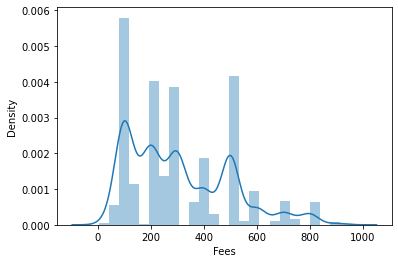

In [118]:
sns.distplot(df_train1["Fees"])

In [119]:
df_train1["Fees"]=df_train1["Fees"].fillna(df_train1["Fees"].median())

<AxesSubplot:>

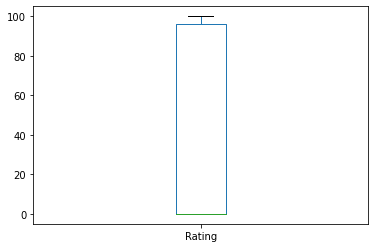

In [120]:
df_train1["Rating"].plot.box()

<AxesSubplot:>

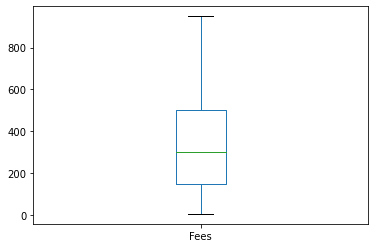

In [121]:
df_train1["Fees"].plot.box()

<AxesSubplot:>

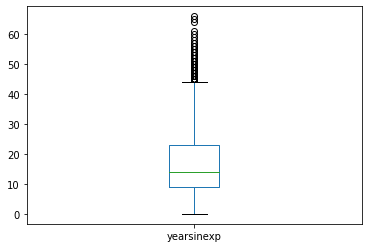

In [122]:
df_train1["yearsinexp"].plot.box()

<AxesSubplot:>

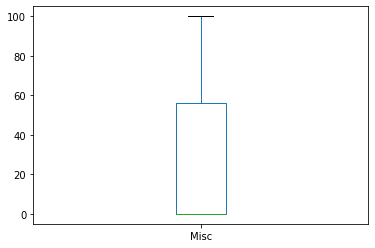

In [123]:
df_train1["Misc"].plot.box()

<AxesSubplot:>

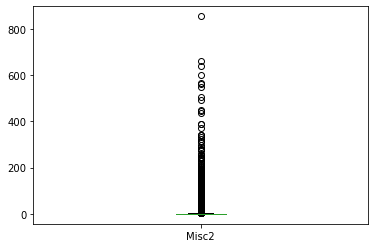

In [124]:
df_train1["Misc2"].plot.box()

In [125]:
#outliers present in "Misc2", "yearsinexp" column

In [126]:
df_train1.skew()

Rating            0.247186
Profile           0.108803
Fees              0.751870
Qualification1    0.017638
Qualification2   -0.602785
yearsinexp        0.991089
City              0.081154
Address           0.098359
Misc              1.176325
Misc2             9.113752
dtype: float64

<AxesSubplot:xlabel='Fees'>

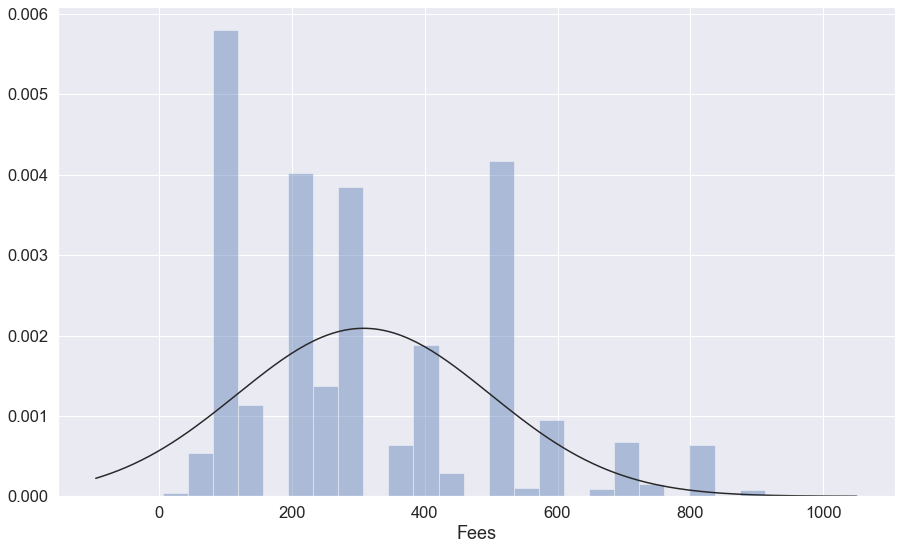

In [127]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df_train1.Fees, kde=False, fit=norm)

<AxesSubplot:xlabel='yearsinexp'>

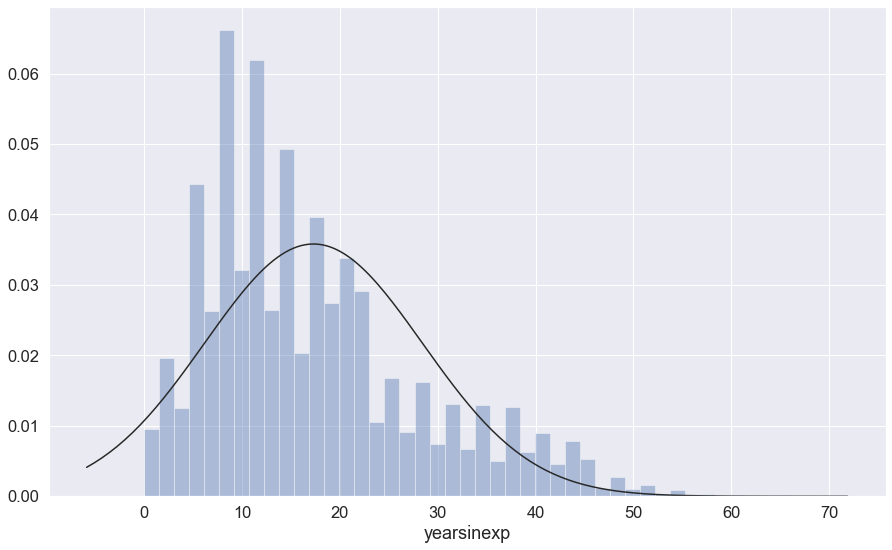

In [128]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df_train1.yearsinexp, kde=False, fit=norm)

<AxesSubplot:xlabel='Misc2'>

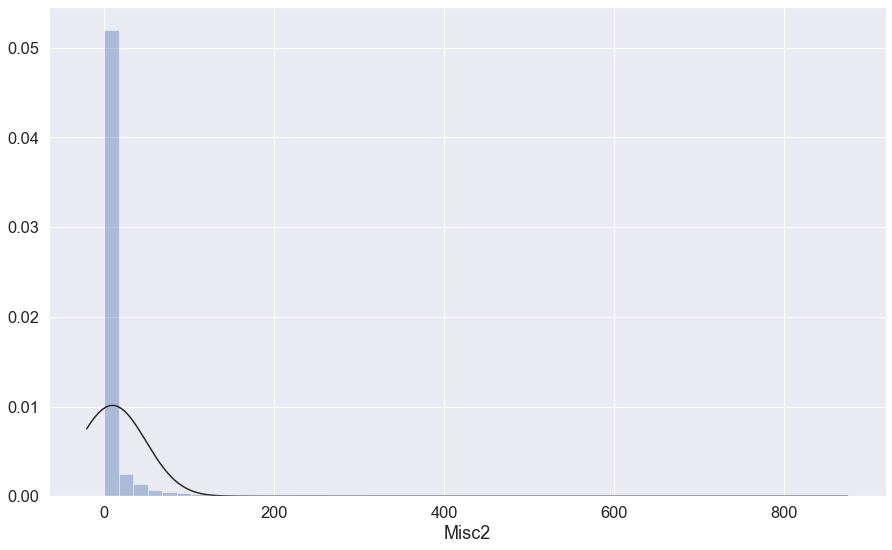

In [129]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df_train1.Misc2, kde=False, fit=norm)

In [130]:
dfcor=df_train1.corr()

In [131]:
dfcor

,Rating,Profile,Fees,Qualification1,Qualification2,yearsinexp,City,Address,Misc,Misc2
Rating,1.000000,-0.126389,0.153273,-0.008193,-0.166360,-0.038569,-0.106276,-0.045805,0.634972,0.278869
Profile,-0.126389,1.000000,0.145226,0.308727,-0.000463,0.202073,-0.017894,0.016806,0.058647,0.012679
Fees,0.153273,0.145226,1.000000,0.234758,-0.178109,0.002117,-0.041873,-0.063730,0.158043,0.089227
Qualification1,-0.008193,0.308727,0.234758,1.000000,-0.416768,0.206712,-0.025593,0.006465,0.145757,0.080277
Qualification2,-0.166360,-0.000463,-0.178109,-0.416768,1.000000,-0.046052,0.040516,0.020711,-0.147487,-0.072363
yearsinexp,-0.038569,0.202073,0.002117,0.206712,-0.046052,1.000000,0.013826,0.000530,0.051769,0.018701
City,-0.106276,-0.017894,-0.041873,-0.025593,0.040516,0.013826,1.000000,-0.065079,-0.098948,-0.067965
Address,-0.045805,0.016806,-0.063730,0.006465,0.020711,0.000530,-0.065079,1.000000,-0.021356,-0.021857
Misc,0.634972,0.058647,0.158043,0.145757,-0.147487,0.051769,-0.098948,-0.021356,1.000000,0.435751
Misc2,0.278869,0.012679,0.089227,0.080277,-0.072363,0.018701,-0.067965,-0.021857,0.435751,1.000000


<AxesSubplot:>

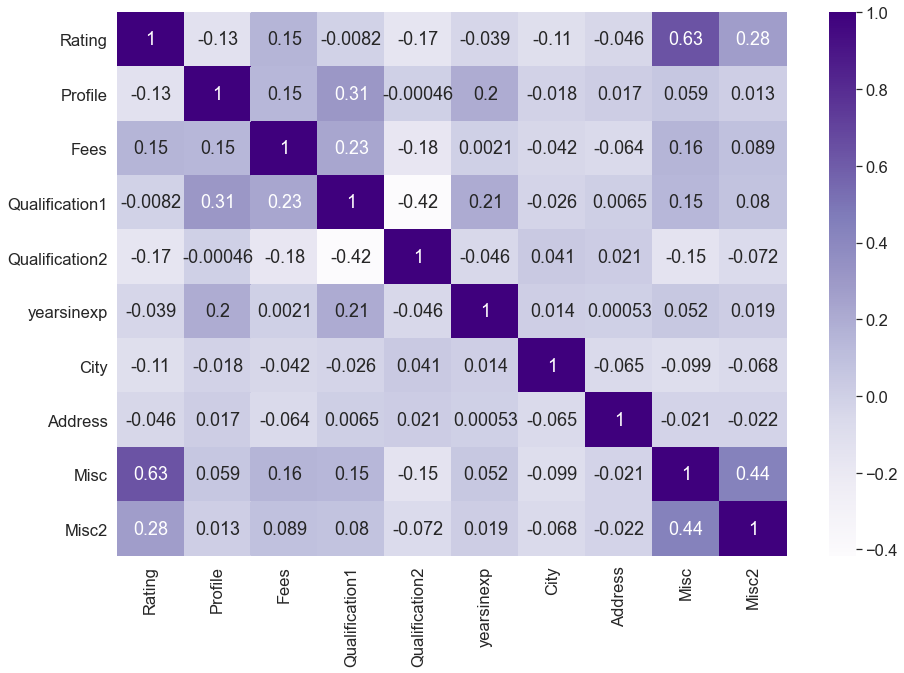

In [132]:
plt.figure(figsize=(15,10))
sns.heatmap(dfcor,cmap="Purples",annot=True)

In [133]:
#by this graph we can understand the correlaton between the columns

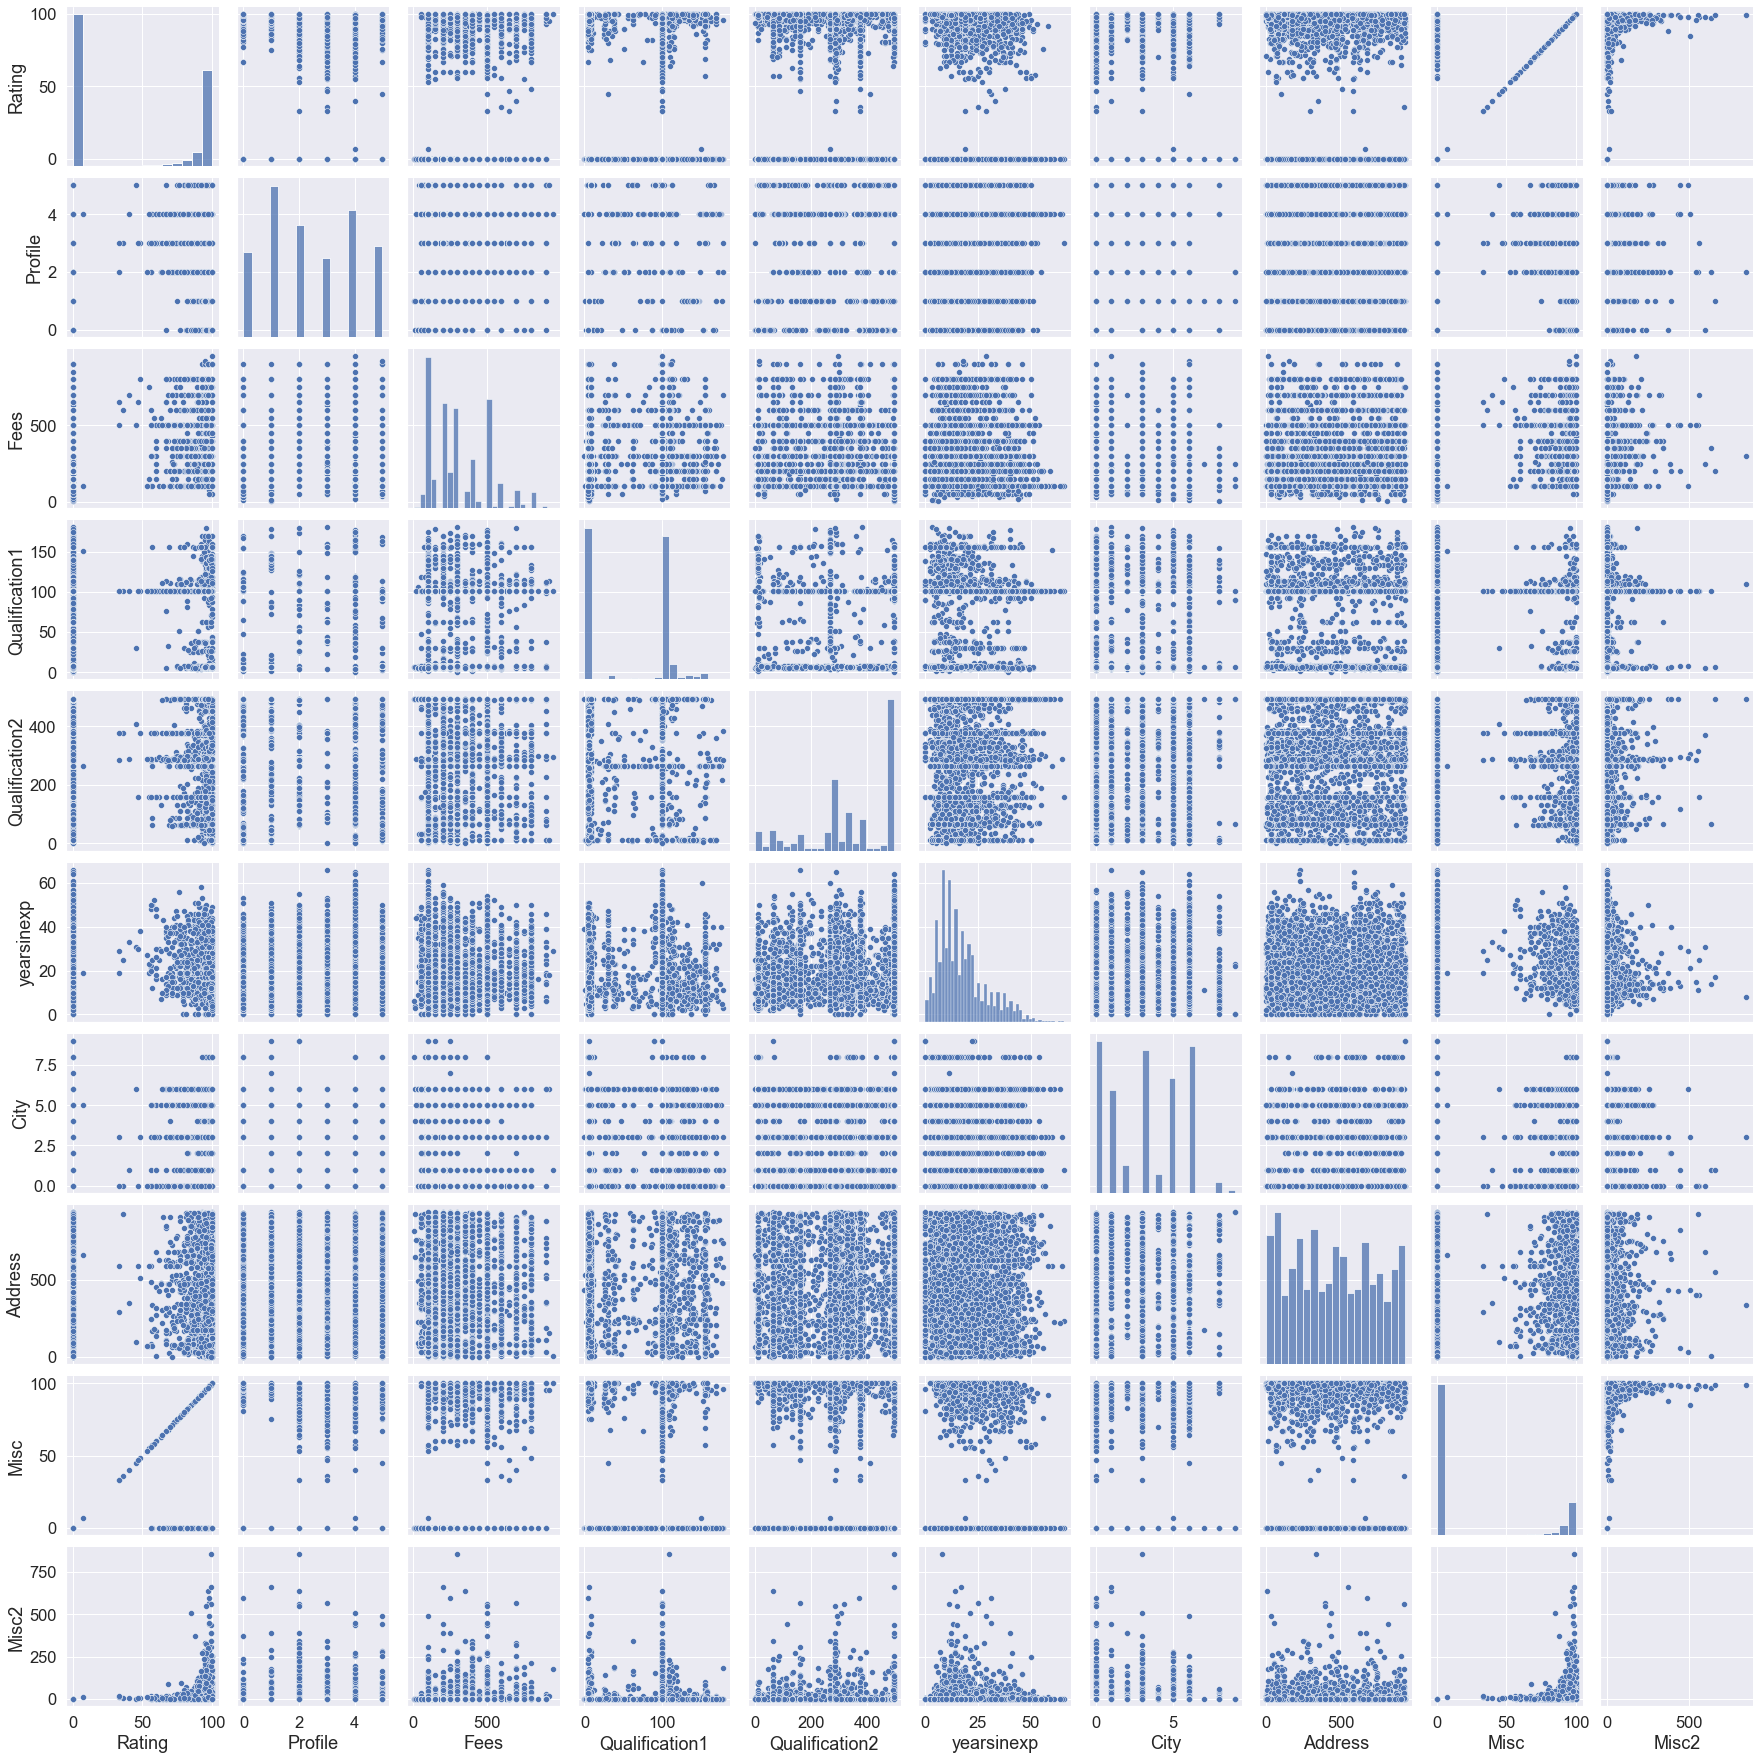

In [134]:
sns.pairplot(df_train1)

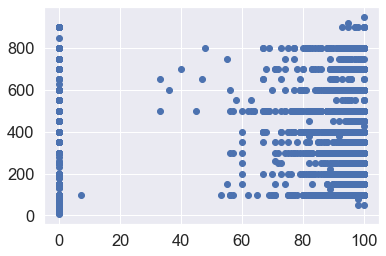

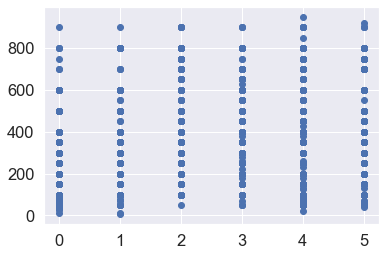

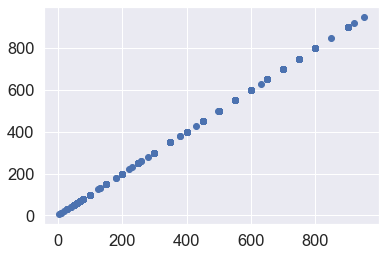

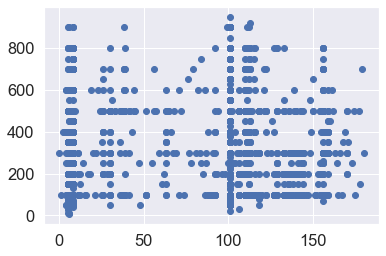

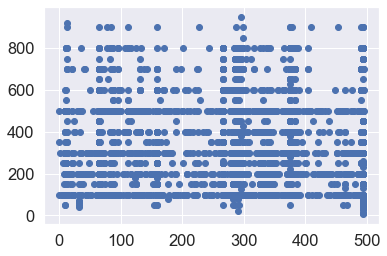

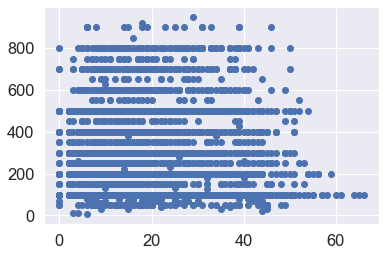

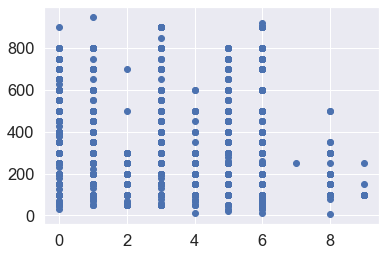

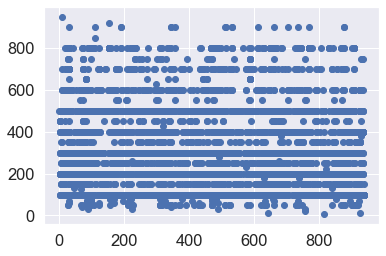

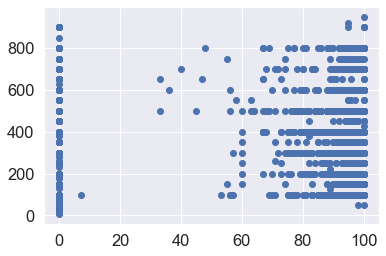

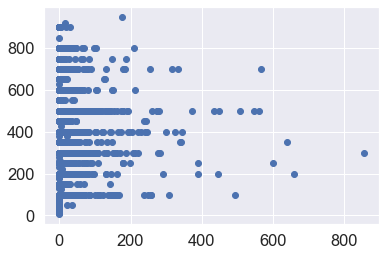

In [135]:
columns=df_train1.columns

for i in columns:
    plt.figure()
    plt.scatter(df_train1[i],df_train1["Fees"])

In [136]:
from scipy.stats import zscore

In [137]:
df4=df_train1[["Fees","yearsinexp", "Misc2"]]
z=np.abs(zscore(df4))
df_new=df_train1[(z<3).all(axis=1)]

In [138]:
print("shape before and after")
print("shape before".ljust(20),":",df_train1.shape)
print("shape after".ljust(20),":",df_new.shape)
print("pecentage loss".ljust(20),":",(df_train1.shape[0]-df_new.shape[0])/df_train1.shape[0])

shape before and after
shape before         : (5961, 10)
shape after          : (5800, 10)
pecentage loss       : 0.02700889112565006


In [139]:
q1=df4.quantile(0.25)
q3=df4.quantile(0.75)
IQR=q3-q1

In [140]:
df_new1=df_train1[~((df4<(q1-1.5*IQR)) |(df4>(q3+1.5*IQR))).any(axis=1)]

In [141]:
print("shape before and after")
print("shape before".ljust(20),":",df_train1.shape)
print("shape after".ljust(20),":",df_new1.shape)
print("pecentage loss".ljust(20),":",(df.shape[0]-df_new1.shape[0])/df_train1.shape[0])

shape before and after
shape before         : (5961, 10)
shape after          : (4474, 10)
pecentage loss       : 0.2494547894648549


In [142]:
#applied IQR and there is 0.24% data loss so we will go with zscore

In [143]:
df_new1.shape

(4474, 10)

# working on testing data 

<AxesSubplot:>

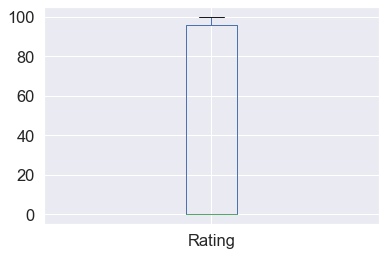

In [144]:
df_test1["Rating"].plot.box()

<AxesSubplot:>

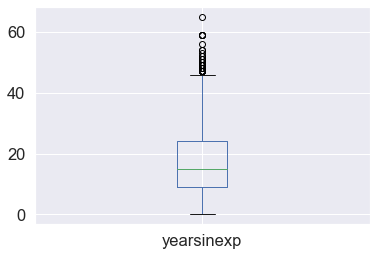

In [145]:
df_test1["yearsinexp"].plot.box()

<AxesSubplot:>

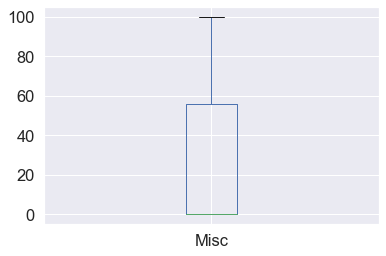

In [146]:
df_train1["Misc"].plot.box()

<AxesSubplot:>

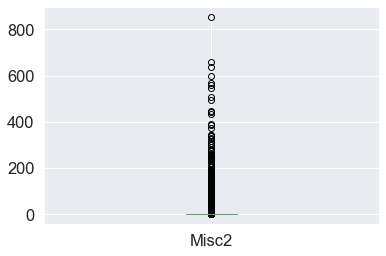

In [147]:
df_train1["Misc2"].plot.box()

In [148]:
# YEARSINEXP AND MISC2 COLUMN ARE HAVING OUTLIERS

In [149]:
df_test1.skew()

Rating            0.225321
Profile           0.028926
Fees                   NaN
Qualification1   -0.056529
Qualification2   -0.535373
yearsinexp        0.963447
City              0.056841
Address           0.108453
Misc              1.025322
Misc2             6.620592
dtype: float64

<AxesSubplot:xlabel='yearsinexp'>

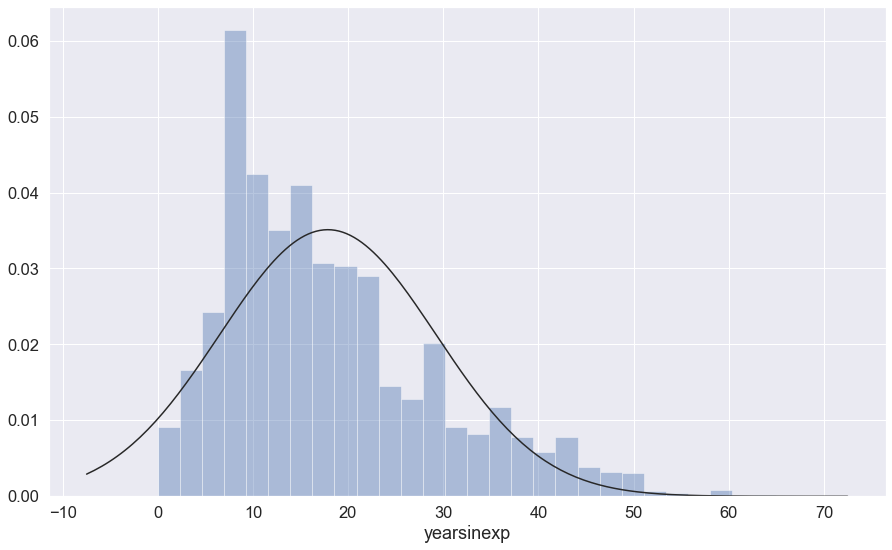

In [150]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df_test1.yearsinexp, kde=False, fit=norm)

<AxesSubplot:xlabel='Misc2'>

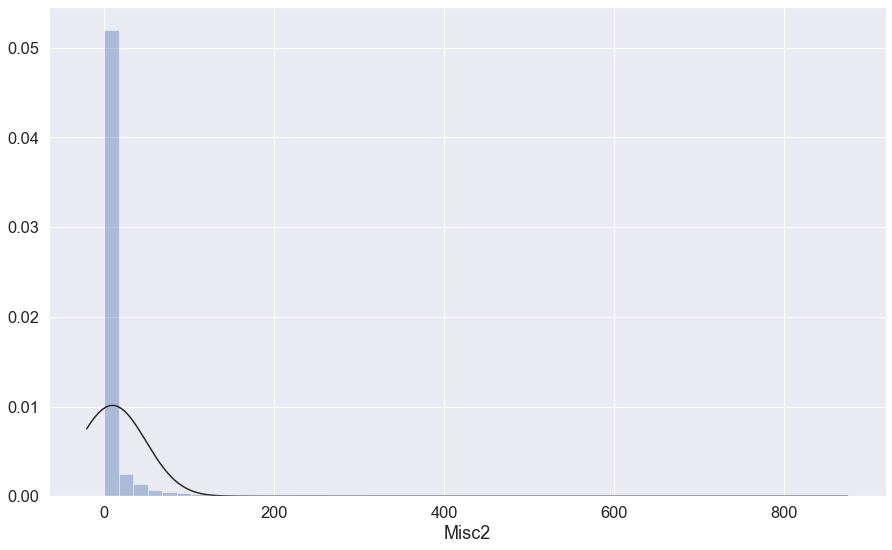

In [151]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df_train1.Misc2, kde=False, fit=norm)

In [152]:
dfcorrr=df_test1.corr()

<AxesSubplot:>

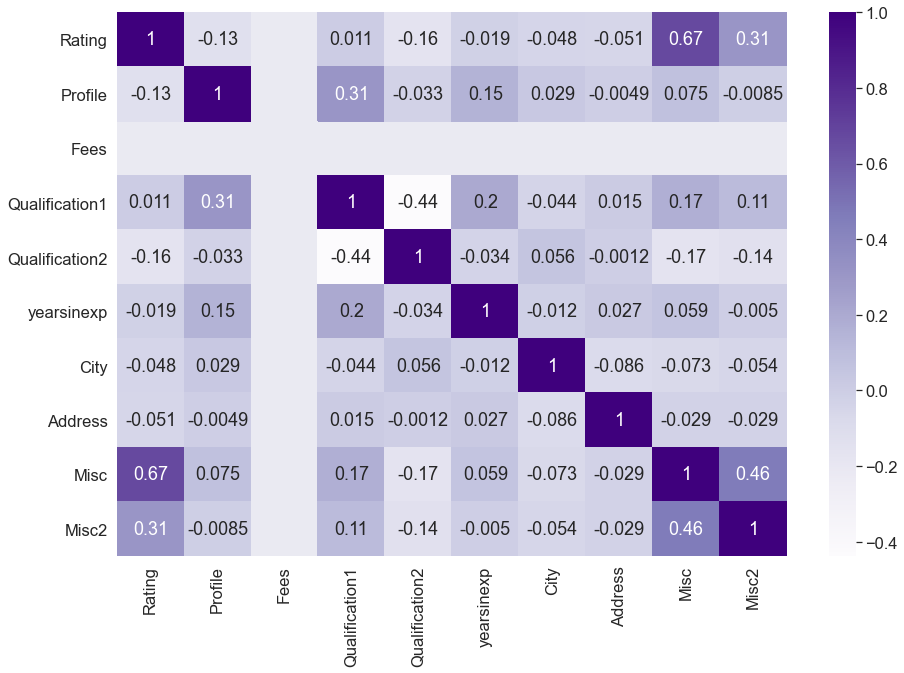

In [153]:
plt.figure(figsize=(15,10))
sns.heatmap(dfcorrr,cmap="Purples",annot=True)

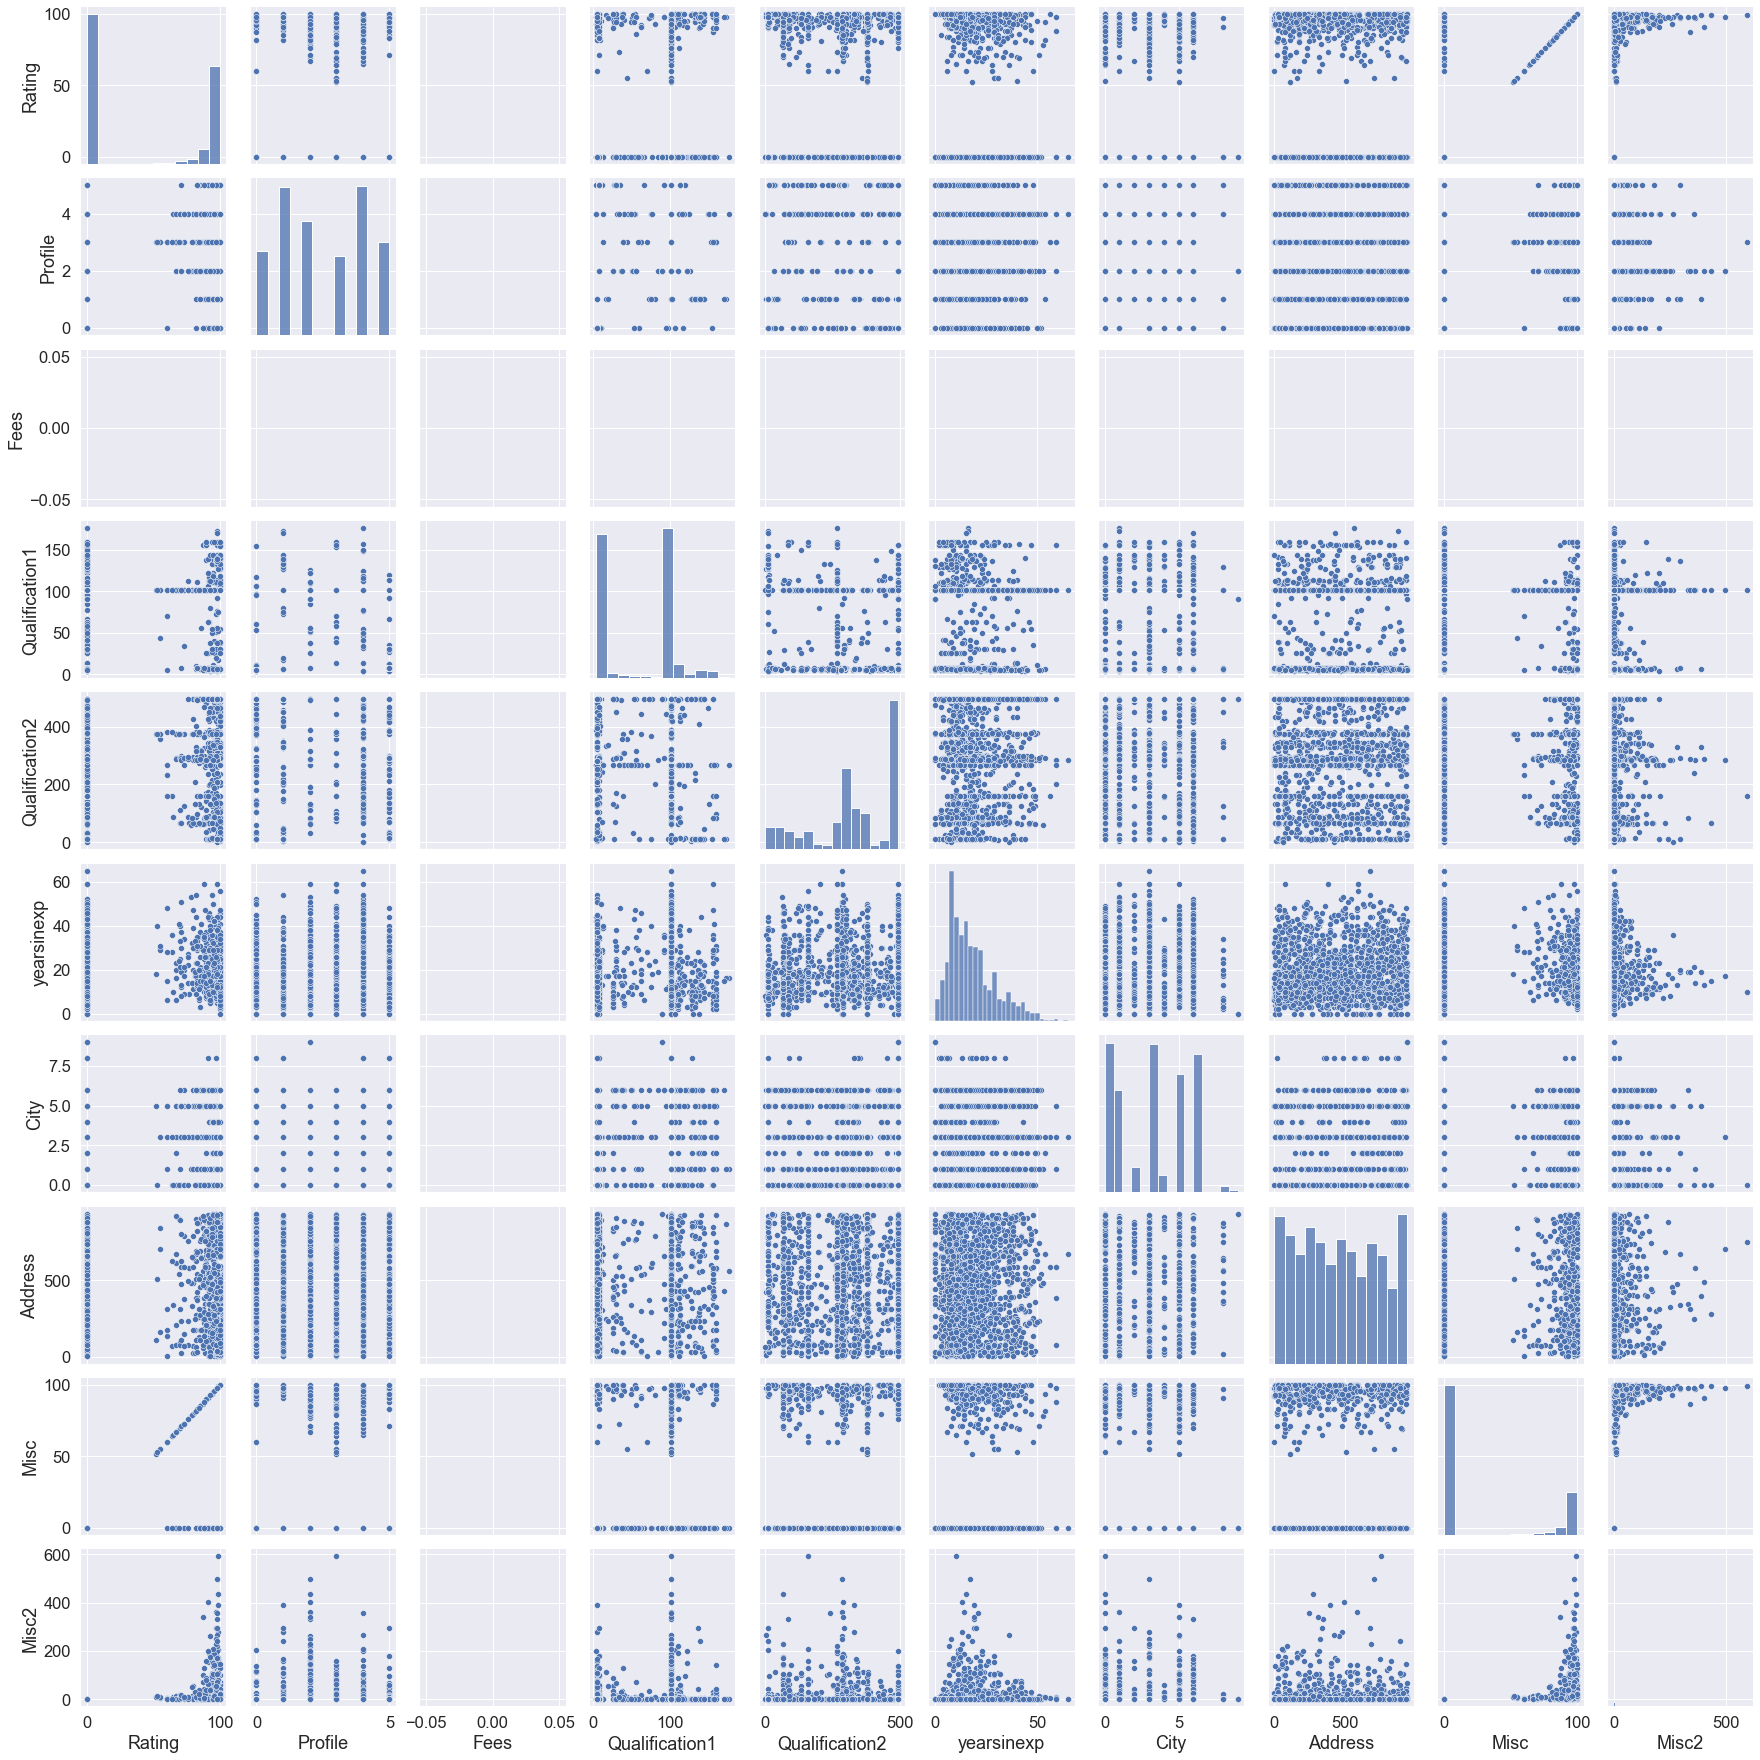

In [154]:
sns.pairplot(df_test1)

In [155]:
df3=df_test1[["yearsinexp", "Misc2"]]
z=np.abs(zscore(df3))
df_new_test=df_test1[(z<3).all(axis=1)]

In [156]:
print("shape before and after")
print("shape before".ljust(20),":",df_test1.shape)
print("shape after".ljust(20),":",df_new_test.shape)
print("pecentage loss".ljust(20),":",(df_test1.shape[0]-df_new_test.shape[0])/df_test1.shape[0])

shape before and after
shape before         : (1987, 10)
shape after          : (1929, 10)
pecentage loss       : 0.0291897332662305


In [157]:
Q1=df3.quantile(0.25)
Q3=df3.quantile(0.75)
IQR=Q3-Q1

In [158]:
df_new2=df_test1[~((df3<(Q1-1.5*IQR)) |(df3>(Q3+1.5*IQR))).any(axis=1)]

In [159]:
print("shape before and after")
print("shape before".ljust(20),":",df_test1.shape)
print("shape after".ljust(20),":",df_new2.shape)
print("pecentage loss".ljust(20),":",(df_test1.shape[0]-df_new2.shape[0])/df_test1.shape[0])

shape before and after
shape before         : (1987, 10)
shape after          : (1558, 10)
pecentage loss       : 0.2159033719174635


In [160]:
#applied IQR and there is 0.21% data loss so we will go with zscore

In [161]:
#df_new for the training data

In [162]:
df_new.head()

,Rating,Profile,Fees,Qualification1,Qualification2,yearsinexp,City,Address,Misc,Misc2
0,100,5,100.0,8,293,24,4,324,100,16
1,98,0,350.0,5,282,12,0,925,98,76
2,0,3,300.0,101,383,9,0,494,0,0
3,0,0,250.0,14,10,12,0,74,0,0
4,100,0,250.0,5,494,20,1,367,100,4


In [163]:
df_new_test.head()

,Rating,Profile,Fees,Qualification1,Qualification2,yearsinexp,City,Address,Misc,Misc2
0,0,4,NaN,101,494,35,6,217,0,0
1,0,3,NaN,101,159,31,5,923,0,0
2,70,2,NaN,101,65,40,1,314,70,4
3,0,0,NaN,5,494,0,3,573,0,0
4,100,1,NaN,6,328,16,0,340,0,0


In [164]:
df_new.shape

(5800, 10)

In [165]:
df_new_test.shape

(1929, 10)

In [166]:
#so this is the final training and testing data

In [167]:
c=5800+1929

In [168]:
c

7729

In [169]:
c1=(1929/7729)*100

In [170]:
c1

24.957950575753653

In [171]:
x=df_new.drop("Fees",axis=1)
y=df_new["Fees"]

In [172]:
#seprated the training and testing data

In [173]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4640, 9)
(1160, 9)
(4640,)
(1160,)


In [175]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [176]:
#using svr

In [177]:
from sklearn.svm import SVR
reg = SVR(gamma = 0.1)
reg.fit(x_train,y_train)
ans = reg.predict(scaler.transform(x_test))

In [178]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

In [179]:
score(ans,y_test)

0.7984032300786089

In [180]:
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
scorer = make_scorer(score,greater_is_better=True)

In [181]:
from sklearn.model_selection import GridSearchCV

parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
reg2 = GridSearchCV(reg,param_grid=parameters,scoring=scorer, n_jobs=-1,cv=4)

In [182]:
reg2.fit(x_train,y_train)
ans2=reg2.predict(scaler.transform(x_test))

In [183]:
score(ans2, y_test)

0.8055011190043344

# Using KNN Regressor

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

poly = PolynomialFeatures(2)

In [188]:
from sklearn.neighbors import KNeighborsRegressor

parameters = {'n_neighbors':np.arange(2,20)}

neigh = KNeighborsRegressor()

reg = GridSearchCV(neigh,param_grid=parameters,scoring=scorer, n_jobs=-1,cv=4)
reg.fit(x,y)
ans = reg.predict(x_test)
reg.best_estimator_

KNeighborsRegressor(n_neighbors=18)

In [189]:
score(ans,y_test)

0.7989603341178919

In [191]:
#support vector regressor is the best

In [192]:
df_new_test=df_new_test.drop("Fees",axis=1)

In [193]:
ans = reg.predict(df_new_test)

In [194]:
s = pd.Series(ans)
s.values[:10]

array([216.66666667, 280.55555556, 416.66666667, 194.44444444,
       258.33333333, 266.66666667, 438.88888889, 277.77777778,
       197.77777778, 219.44444444])

In [196]:
#predicted values with the testing data with SVR AND KNN 

In [197]:
ans2=reg2.predict(scaler.transform(df_new_test))

s = pd.Series(ans)
s.values[:10]

array([216.66666667, 280.55555556, 416.66666667, 194.44444444,
       258.33333333, 266.66666667, 438.88888889, 277.77777778,
       197.77777778, 219.44444444])

In [198]:
import joblib
joblib.dump(reg2,"Doctor_final_fees.obj")
print("object of the dataset has been created")

object of the dataset has been created
